In [5]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

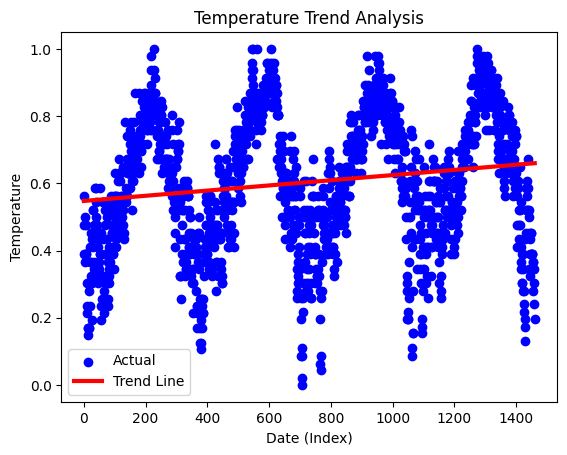

In [8]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('seattle-weather.csv')  # Replace with the path to your dataset

# Normalize the numerical variables
columns_to_scale = ['precipitation', 'temp_max', 'temp_min', 'wind', 'temperature']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Calculate the rolling mean of temperature over a 30-day window
df['temperature_rolling_mean'] = df['temperature'].rolling(window=30).mean()

# Calculate the standard deviation of the rolling mean
temperature_rolling_std = df['temperature_rolling_mean'].std()

# Identify anomalies: days where the temperature is more than 2 standard deviations away from the rolling mean
df['anomaly'] = np.abs(df['temperature'] - df['temperature_rolling_mean']) > 2 * temperature_rolling_std

# Convert date to numerical format for regression
# We'll use the index as a proxy for date
df['date_num'] = df.index

# Prepare the features and target variable
X = df[['date_num']]
y = df['temperature']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
df = df.dropna(subset=['temperature'])  # Drop NaN values in temperature
df = df.reset_index(drop=True)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the original data and the trend line
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=3, label='Trend Line')
plt.title('Temperature Trend Analysis')
plt.xlabel('Date (Index)')
plt.ylabel('Temperature')
plt.legend()
plt.show()
